In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

import pystretch
import pedalboard

In [2]:
# Utility functions
def plotWaveform(y, sr, title):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.show()

# Load example wth librosa

In [3]:
# Load audio file
y, sr = librosa.load("les_bridge_fing01__00000.wav", sr=None, mono=False)

In [4]:
print(f"original y.shape: {y.shape}")
if len(y.shape) != 2:
    y = y[np.newaxis, :]
    print(f"new y.shape: {y.shape}")
print(f"y.dtype: {y.dtype}")
print(f"sr: {sr}")

original y.shape: (507150,)
new y.shape: (1, 507150)
y.dtype: float32
sr: 44100


In [5]:
ipd.display(ipd.Audio(y, rate=sr))

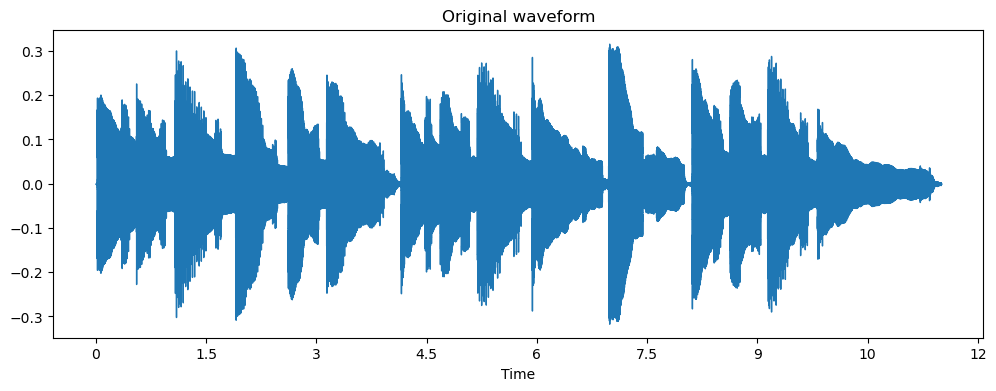

In [6]:
plotWaveform(y, sr, 'Original waveform')

# ===== Pitch shifting =====

In [7]:
# Pitch shift configuration
shift = 12  # semitones

In [8]:
# Create stretch object
stretch = pystretch.SignalsmithStretch.Stretch()
# Configure 
stretch.preset(1, sr)
stretch.setTransposeSemitones(shift)

# Set buffer size
buffer_size = stretch.blockSamples()

In [9]:
# Create pedalboard
board = pedalboard.PitchShift(shift)

In [10]:
# Compute pitch shift
y_stretch = stretch.process(y)
y_librosa = librosa.effects.pitch_shift(y, sr=sr, n_steps=shift)
y_pedalboard = board(y,sr)

## Results: pitch shift

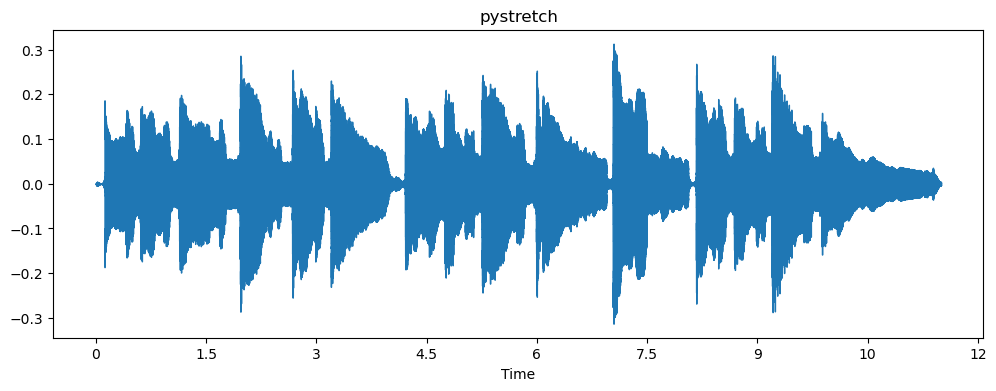

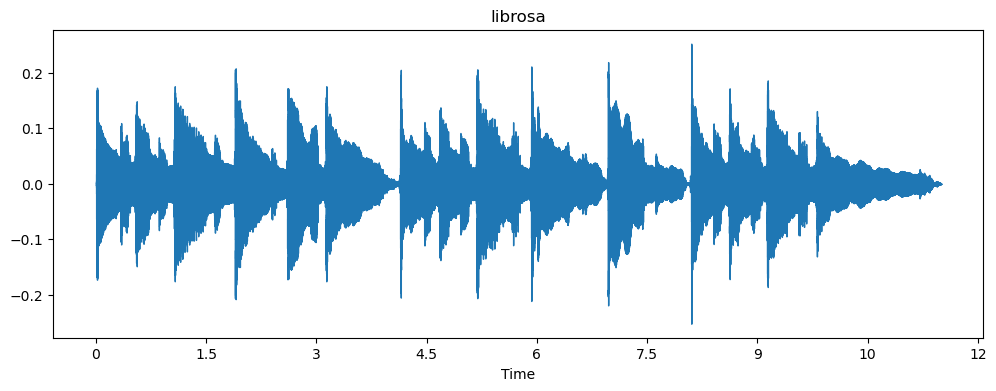

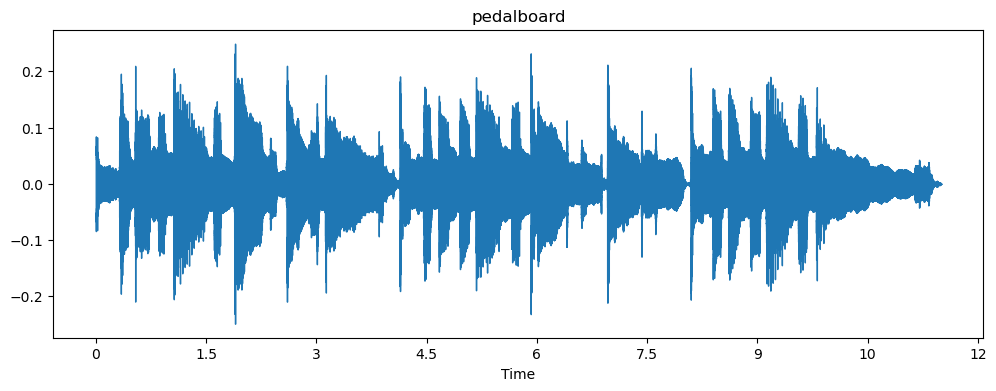

In [11]:
plotWaveform(y_stretch[0], sr, 'pystretch')
plotWaveform(y_librosa[0], sr, 'librosa')
plotWaveform(y_pedalboard[0], sr, 'pedalboard')

In [12]:
# pystretch
ipd.Audio(y_stretch[0], rate=sr)

In [13]:
# librosa
ipd.Audio(y_librosa[0], rate=sr)

In [14]:
# pedalboard
ipd.Audio(y_pedalboard[0], rate=sr)

## Analyze processing time

In [15]:
# %%timeit
# # x_stretch = stretch.process(y)

In [16]:
%%timeit
x_librosa = librosa.effects.pitch_shift(y, sr=sr, n_steps=shift)

106 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
x_pedalboard = board(y,sr)

386 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# ===== Time Stretching =====

In [18]:
# Configure stretch factor
stretch_factor = 1.5

In [19]:
# # pystretch
stretch2 = pystretch.SignalsmithStretch.Stretch()
stretch2.preset(1, sr)
stretch2.setTransposeSemitones(0)
stretch2.timeFactor = stretch_factor

In [20]:
# Compute time stretch
z_stretch = stretch2.process(y)
z_librosa = librosa.effects.time_stretch(y, rate=stretch_factor)
z_pedalboard = pedalboard.time_stretch(input_audio=y, samplerate=sr, stretch_factor=stretch_factor)

## Results: Time Stretching

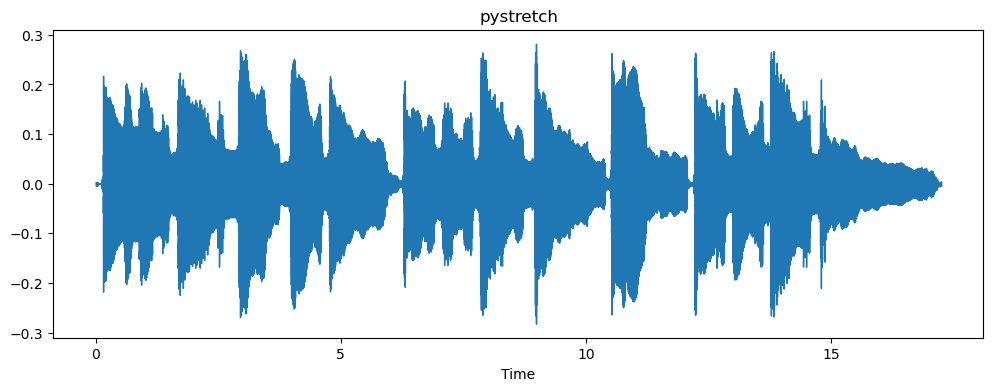

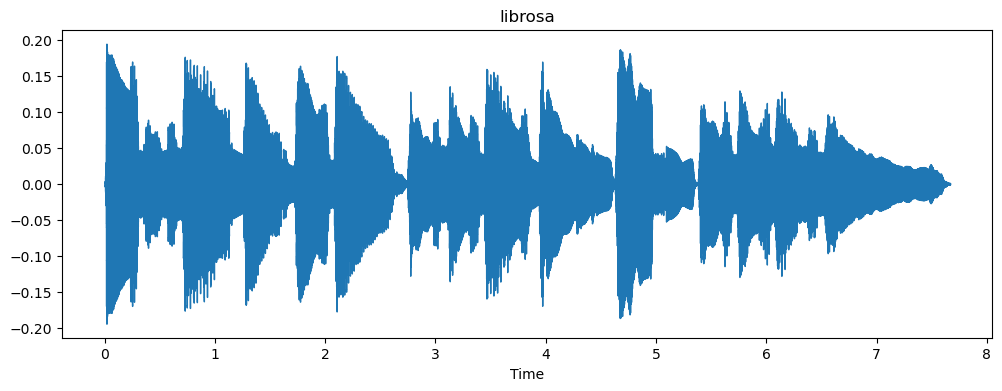

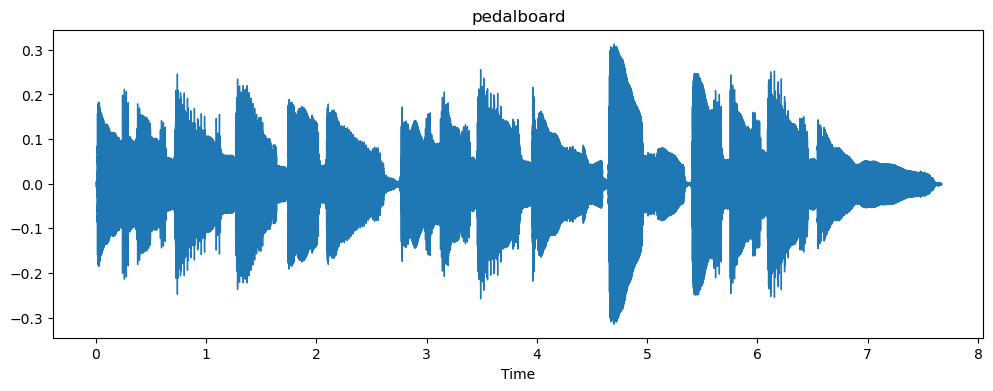

In [21]:
plotWaveform(z_stretch[0], sr, 'pystretch')
plotWaveform(z_librosa[0], sr, 'librosa')
plotWaveform(z_pedalboard[0], sr, 'pedalboard')

In [22]:
ipd.Audio(z_stretch[0], rate=sr)

In [23]:
ipd.Audio(z_librosa[0], rate=sr)

In [24]:
ipd.Audio(z_pedalboard[0], rate=sr)

## Processing Time

In [25]:
%%timeit
z = stretch.process(y)

In [26]:
%%timeit
z = librosa.effects.time_stretch(y, rate=stretch_factor)

39.3 ms ± 738 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit
z = pedalboard.time_stretch(y, sr, stretch_factor)

233 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
